In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#conda install -c conda-forge wordcloud

In [3]:
from wordcloud import WordCloud

In [24]:
traindata=pd.read_csv("Data/X_train")

In [25]:
traindata.shape

(39999, 3)

In [23]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              39999 non-null  int64 
 1   tokenized_summary  39999 non-null  object
 2   tokenized_text     39999 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [19]:
traindata.isna().sum()

index                0
tokenized_summary    0
tokenized_text       0
dtype: int64

In [20]:
traindata.head()

,index,tokenized_summary,tokenized_text
0,778010,"['must', 'have', 'for', 'basset', 'home']","['being', 'dad', 'or', 'mom', 'to', 'basset', ..."
1,2820850,"['amazing', 'book']","['love', 'the', 'patterns', 'in', 'this', 'boo..."
2,391049,"['one', 'of', 'my', 'favorites']","['first', 'read', 'this', 'book', 'about', 'ye..."
3,1586180,"['not', 'sure', 'what', 'all', 'the', 'fuss', ...","['this', 'is', 'the', 'first', 'tolstoy', 'hav..."
4,1860685,"['disturbingly', 'familiar']","['fahrenheit', 'is', 'short', 'and', 'simple',..."


In [15]:
traindata.iloc[0,2] #example of a full review.

"['must', 'have', 'for', 'basset', 'home']"

([<matplotlib.patches.Wedge at 0x7f92308e31f0>,
 [Text(-0.3539105542182642, 1.0415120352703187, '5.0'),
  Text(-0.3335585069843584, -1.04820738521457, '4.0'),
  Text(0.5885337085142986, -0.9293159171898472, '3.0'),
  Text(0.9458765922469973, -0.5615313635401036, '1.0'),
  Text(1.0850342953579053, -0.18083301108252908, '2.0')],
 [Text(-0.1930421204826895, 0.56809747378381, '60.43%'),
  Text(-0.18194100380965, -0.5717494828443108, '19.34%'),
  Text(0.32101838646234465, -0.506899591194462, '8.44%'),
  Text(0.5159326866801802, -0.3062898346582383, '6.54%'),
  Text(0.5918368883770392, -0.09863618786319767, '5.26%')])

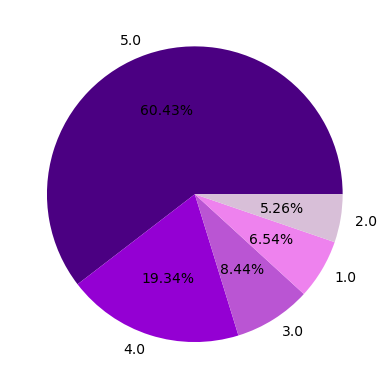

In [38]:
colors = ['indigo', 'darkviolet','mediumorchid','violet','thistle']
labels = subsetData['score'].value_counts().keys().map(str)
values = subsetData['score'].value_counts()
plt.pie(values,colors=colors,labels=labels,autopct='%1.2f%%')

wordcloud reference: https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/

In [14]:
subsetData = subsetData.rename(columns={'review/score': 'score', 'review/summary': 'summary','review/text':'text'})

In [15]:
subsetData.head()

,score,summary,text
0,5.0,Perfect Pocket Book,Medical students are constantly searching for ...
1,5.0,As Time Goes By,I found As Time Goes by a very sweet inspirati...
2,2.0,Don't buy the Kindle version,"Although the story is a very nice one, please ..."
3,3.0,Where it's good it's good. But I kept going ba...,"The Kaplan book is direct, concise, and well-o..."
4,4.0,A good place to start,If you are wondering whether you would like ei...


In [19]:
comment_words = ''

for val in subsetData.text:
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

In [22]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(comment_words)

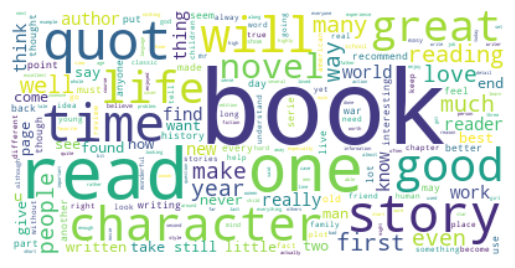

In [24]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()